## Tic tac toe

A configuration of a tic tac toe.

Does the O-player has a winning stratergy?

(We build a binary tree, find each winning stratergy from bottom up)

### Complexity of GO

Number of game configurations go: $3^{n^2}$. (board size n, each has 3 options, black, white, none)

Winning strateries are subtrees
- of exponential depth
- of double exponential size

Configuration game of go  
Does the player that moves next win?

- Repetitions forbidden: maybe EXSPACE-complete
- Simple ko rule: EXP-complete

> The existence of ko fights is implied by the rule of ko, a special rule of the game that prevents immediate repetition of position, by a short 'loop' in which a single stone is captured, and another single stone immediately taken back. The rule states that the immediate recapture is forbidden, for one turn only.

### Complexity of Chess

Number of configurations is exponential.

50 move rule: draw if after 50 moves no pawn is moved or stone is captured.

Winning stratergies have exponential size.

Configurations of a chess game  
Does the player that moves next win?

PSPACE-complete

- Without 50 move rule: EXP-complete
- No-configuration repeated 3 times: maybe EXSPACE-complete

## Winning strategies in two-player games

2-player game  
Does the 1st player has a winning stratergy?

Game:
- finite set of configurations
- subset of winning configurations of 1st player
- function _move-1_: maps conf $c$ to set of possible conf after a move of 1st player
- function _move-2_: similar

__Dynamic programming__

Build tale W. (rows are indexed by configurations of game, columns are indexed by a time bound)

Initially all cells of W equal False,

For all winning conf c: W(c, 0) = True. (set to true if from this configuration, we have a winning strategy at most t steps. For example, if we set t equal to zero, it is true if we have a winning strategy with most zero steps. We are standing at winning position of the game)

For t = 0,1,.. for all c: if either

- W(c, t) = True (indeed, we already have winning stratergy at t step, we still have a winning stratergy at t+1 steps)

- t is odd and $\lor \{W(\tilde{c}, t) : \tilde{c} \in move-1 (c)\}$ (look at the previous column and check all cells that we can reach in one move.)

- t is even and $ \& \{W(\tilde{c}, t) : \tilde{c} \in move-2 (c)\}$ (If t is even, we have to look to the possible moves of the opponent. We are in a winning configuration with at most t+1 moves. of for every possible move of the opponent, we land in a winning position.)

Set W(c,t+1)=True

complexity: size table = number of conf times max number of moves

### Cat and mouse game

Give a graph and 3 nodes containing position of mouse, cat and the hole.  
Can mouse reach the hold before cat?

Game configuration
- position of mouse
- position of cat
- the next player

The bound of the dynamic programming table is $2n^2 \times 2n^2$

Number of configurations $n \times n \times 2$. (n possible positions, 2 possible next player)

Number of moves is the number of configurations. (can't repeat, becasue if cat can repeat some stratergy, the mouse will never move to the hole)

Size of table = Number of configurations $\times$ Number of moves  = $4n^2$

Filling the table takes $8n^6$ elementary operations.

Remark: after building column $t$, we no longer need column $t-1$, and can clear the memory.

## PSPACE

### Definition SPACE(s(n))

TIME(t(n)) = class of languages decidable in time O(t(n)).

SPACE(t(n)) = class of languages decidable in space O(s(n)).

Measure space of variables as for inputs.

- bits, integers, rational numbers, strings
- lists of such objects

E.g. integer k is stored using space $O(\log k)$

Examples of problems in SPACE(n)

_Graph reachability_ (P)

Given a graph and nodes s,f  
Is there a path from s to f?

_Equivalent boolean formula_ (coNP)

Given boolean formulas F and G with n variables  
$\forall x \in \{0, 1\}^2: F(n) = G(n)$?

_Minimum boolean forumla_ (coNP?)

Boolean formula F  
Is there a smaller formula equivalent to F?

$P = \bigcup_c TIME(n^c)$

$PSPACE = \bigcup_c SPACE(n^c)$

Assumption: elementary operations increase the size of a variable by at most 1

$P \subseteq PSPACE$

## The rules of the Generalized Geography game

_London->New york->Kyoto->..._

Input: Directed graph, starting node. (vertices are cities, connected if last char => first char.)  
Question: Does the first player has a winning stratergy?

when a player can not move from the node his opponent is on, to another node that is not visited, he loses.  
(If one player force another player into a dead end)

## Generalized Geography is PSPACE-complete

TQBF (True quantified Boolean formula)

- A quantified boolean formula  
- Is the formula True?

__Reduction from TQBF to Generalized Geography game__

$\exists x \forall y \exists z: (y \lor \overline{z}) \& (\overline{y} \lor z) \& (x \lor y)$

($\exists$ player choose x=1, it becomes $(y \lor \overline{z}) \& (\overline{y} \lor z)$, no matter how $\forall$ player choose y, $\exists$ player can choose z=y, to make the formula true)

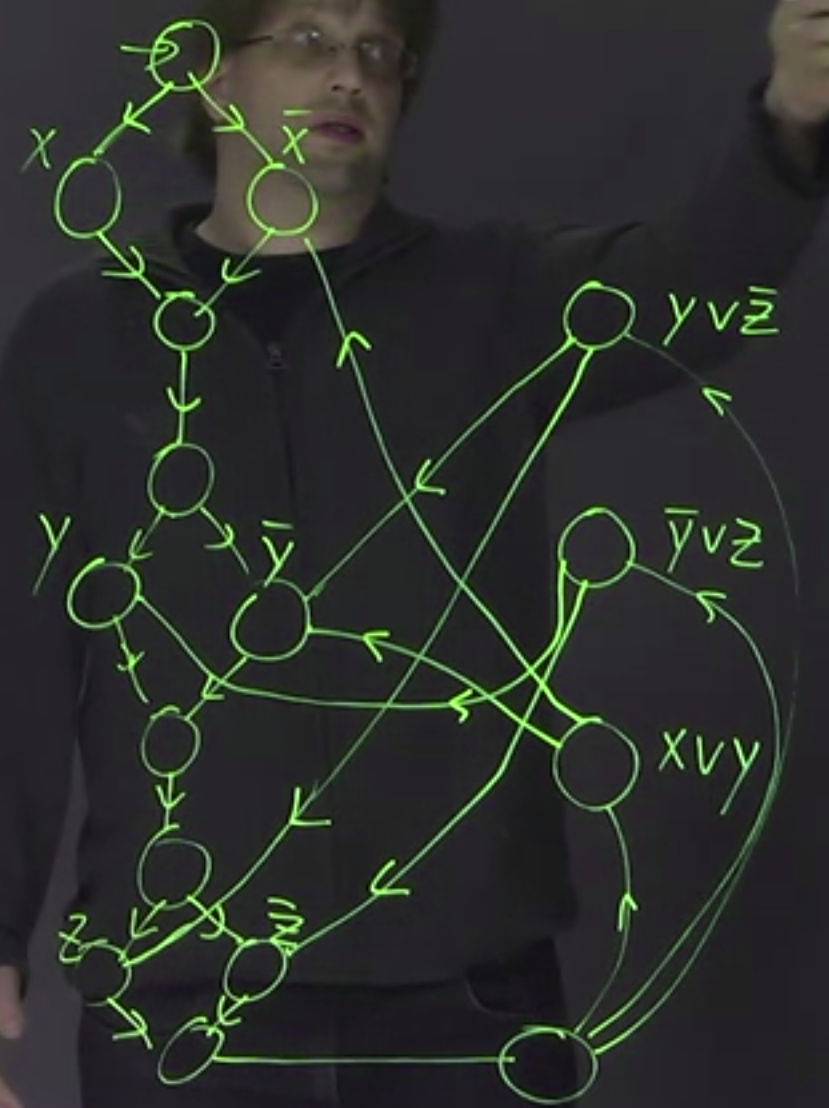

As usual, each variable has a gadget, each clause has a gadget. The edge connecting each variable gadget represent switch players. 

Each variable gadget has two options, 0 and 1, either $x=1$ or $\overline{x}=1$. 

There is an end node at the end of all variable gadget, it connect to each clause node. (so the player can choose any of the clause after chose a value for every variable.)

Each clause connect to the correspond negation literals, e.g. $\overline{y} \lor z$ connect to $y$ and $\overline{z}$.

This is example is 2CNF, but the same rule can generalized to kCNF.

The number of variable gadget (has constant number of nodes) is equal to the number of variable in the formula. Which is bounded by the input size.

The number of clause gadget also equal to the number of clause in the formula. Which is bounded by the input size.

The edges is proportional to the variables and clauses.

---

Claim: Since this clause is True, I claim that the first player in generalized geography has a winning strategy.

If the clause is True, the moment we arrive at the clause gadget, the first player still has at least one node to go to. (eg.$\overline{y} \lor z$ is True. so either $y$ or $\overline{z}$ is false, which means it is not occupied. Once the first player take it, there is no way left for the second player.)

If any of the clause is False, the second player can choose the clause which is False, and win the geography game. (eg.$\overline{y} \lor z$ is False. so both $y$ and $\overline{z}$ are True, which means both taken. there is no way left for the first player.)

(Does the above mean, the second player always got to choose which clause?)

Thus as long as the first player choose value for variables that make the formula True, it has a winnig stratergy in the generalized geography game.

_Proof:_ If the first player has a winning stratery, the formula is True.

If the firs player play the winning stratergy, so when the second layer arrive at any of the clause gadget, the first player can make the last move and win the game, which means all clause gadget is True. (there is at least one node the clause connect to is False, not taken) .

__Thus if TQBF is PSPACE-complete, generalized geography is PSPACE complete__

Similar things you can do for many games. Many games are PSPACE-complete. Like chess and the game of Go.